In [19]:

import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

In [20]:
# load audio file in the player
audio_path = '../../nmb_data/teamvoice/clear/testvoice_F1(clear).wav'
signal, sr = librosa.load(audio_path, mono=True, offset=0, duration=5)
sd.play(signal, sr)

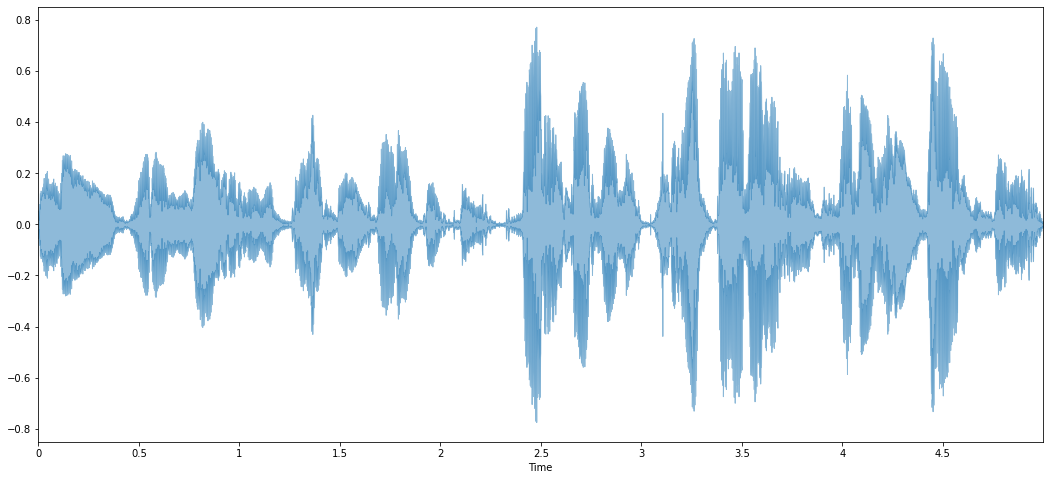

In [21]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()

x : time    
y : amplitude

# Fourier Transform

In [22]:
# derive spectrum using FT
ft = sp.fft.fft(signal)     # Fast Fourier Transform
magnitude = np.absolute(ft) # ft에 절댓값을 씌우면 amplitude가 나온다. >> y축
frequency = np.linspace(0, sr, len(magnitude))  # x축

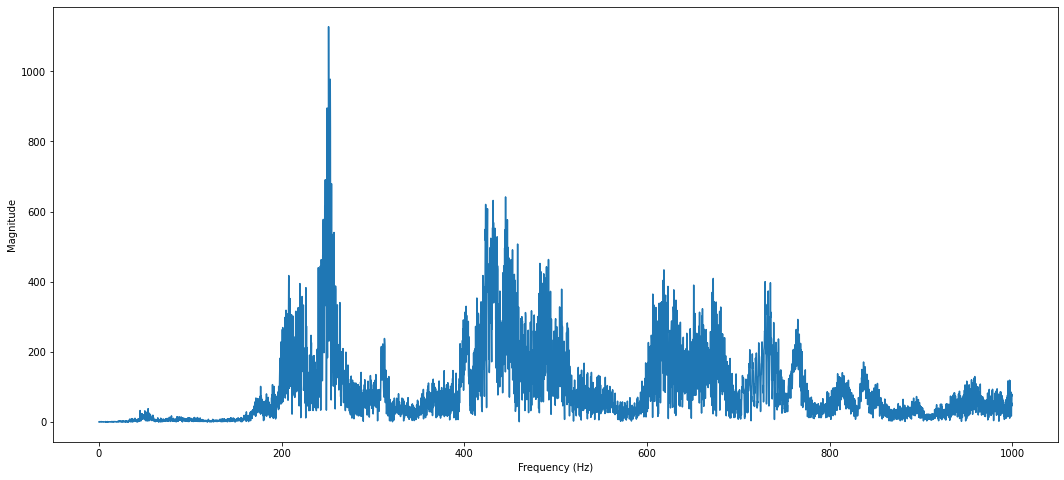

In [23]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

peak 되어 있는 부분 : fundamental sound (기음)    
뒤에 있는 부분 : harmonic sound (배음)    

In [24]:
len(signal)

110250

In [27]:
# duration of each samples 
d = 1 / sr
d

4.5351473922902495e-05

In [28]:
# duration 을 지정해준다.
d_523 = 1 / 523
d_523

0.0019120458891013384

In [29]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

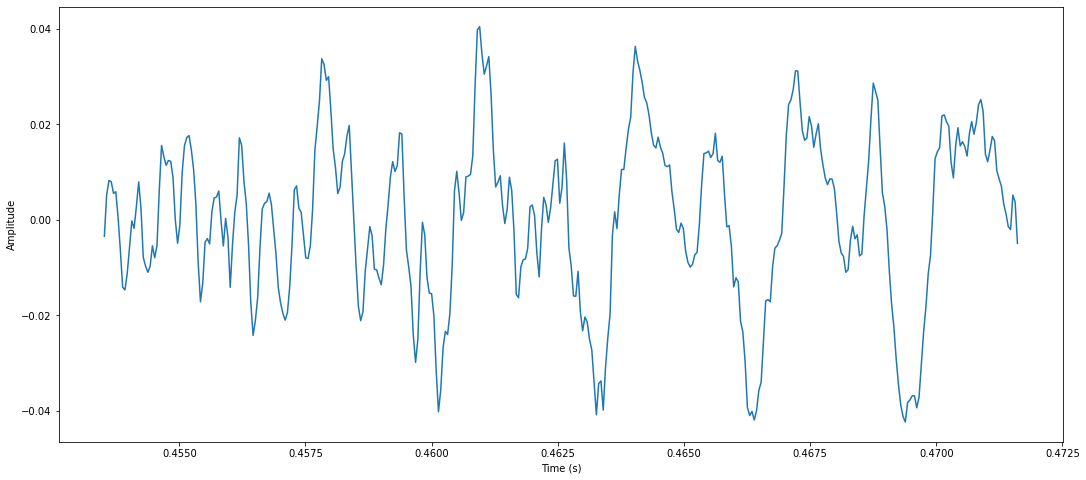

In [30]:
# [1] Origin Signal : zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

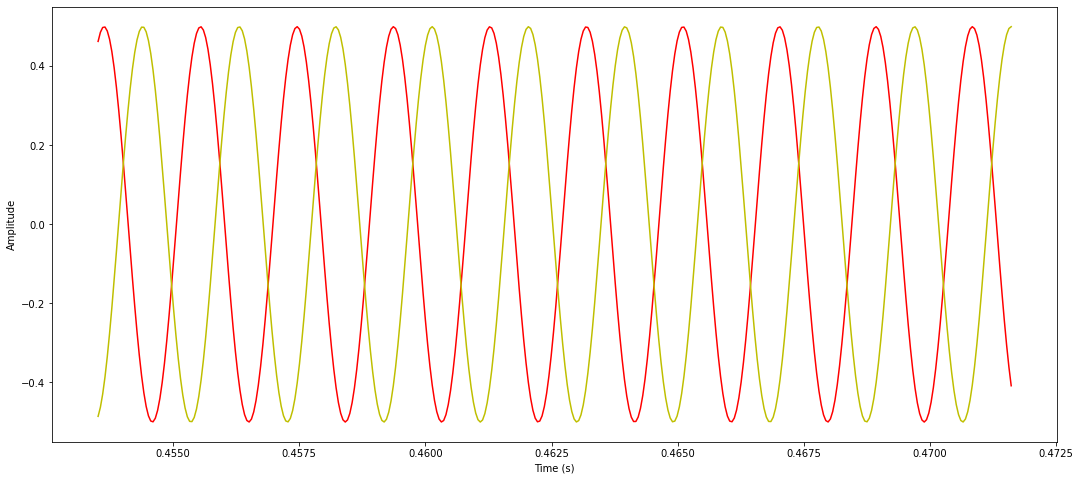

In [40]:
# [2] Sinusoids of various frequency
# create a sinusoid

f = 523
phase = 0
phase2 = 0.4

# phase2 를 1, 2, 3, ... 으로 하면 phase 와 동일한 그래프가 나온다.
# phase2 를 0.5로 지정하면 phase와 위 아래로 뒤집어진 모양이 나온다.

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Text(0, 0.5, 'Amplitude')

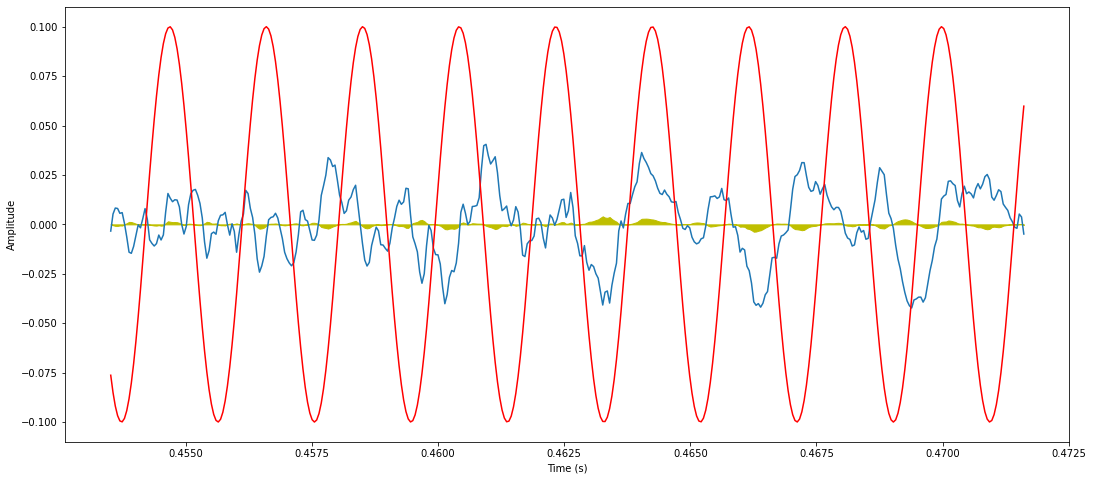

In [44]:
# compare signal and sinusoids
# similarity를 어떻게 계산하는 가? >> 뒤 시그널 값을 곱한다.

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])   # [1] original
plt.plot(t[10000:10400], sin[10000:10400], color="r") # [2] sinusoids

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y") # [3] original * sinusoids
# 위쪽에 yellow로 채워져 있는 부분이 많을수록 >> higher similarity between original * sinusoids

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

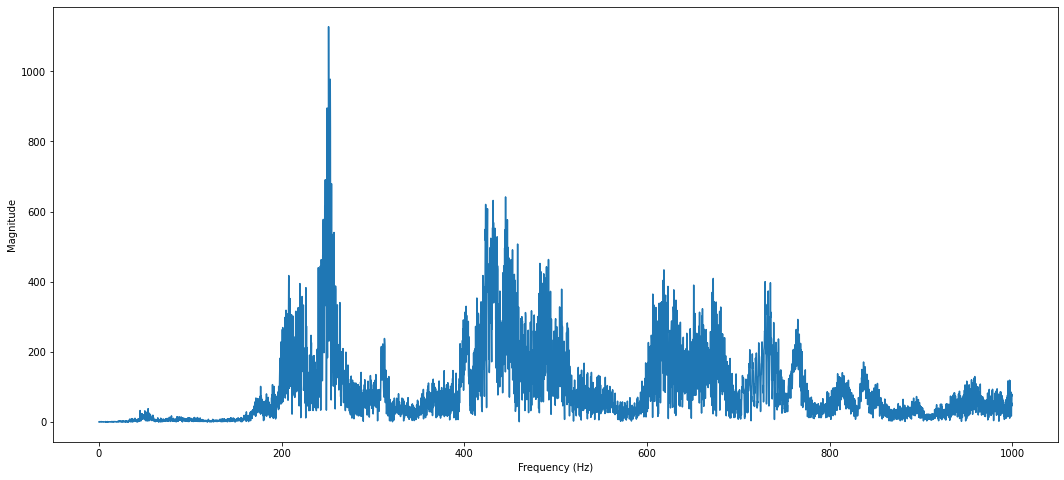

In [48]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

위에서 노란색이었던 부분이 FFT에서 높이 솟아져 있는 부분이다. == original sound와 sinusoid sound 가 비슷한 부분이다. 

# superimposing pure tones
음성 합성


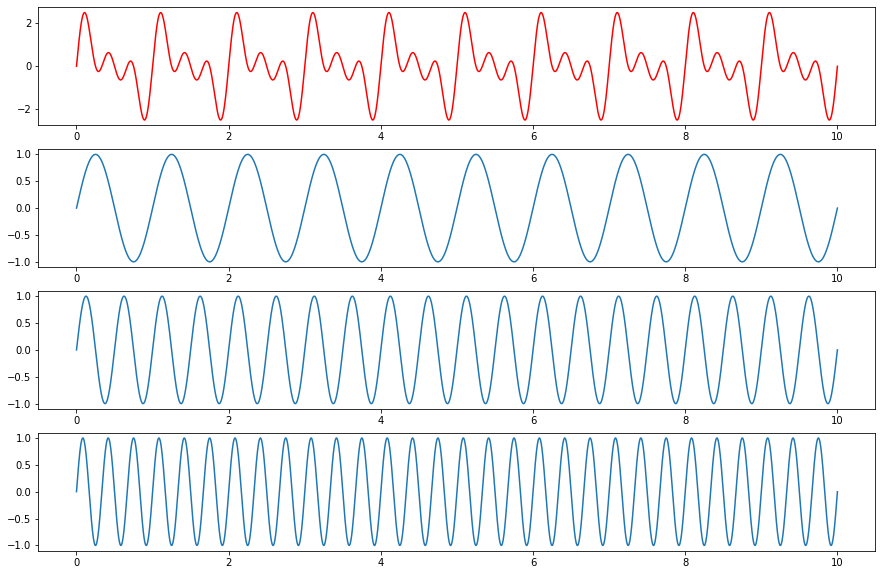

In [50]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()